<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6>Outliers</font></h1>
<h2 align=center><font size = 5>Lab Exercise 2.6</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this example, we take the dataset already introduced in Exercise 2.3, as well as the "Star Cluster CYG OB1" dataset, and check for the presence of outlier(s). Outliers are observations that reside far away from the rest of your observations. Outliers may be in $x$ and/or $y$ directions. It is important to localize outliers if there exists in your dataset as they may affect your linear model, thus conclusions drawn from your model (like predictions) might be diverted from reality. After we localize the outliers in our toy dataset, we make a comparison of the models with and without outlier(s). The "Blood pressure vs. age" dataset was already introduced in Exercise 2.1. The second dataset, called "Star cluster", contains the energy output and surface temperature for Star Cluster CYG OB1. The objective is to find a linear relationship between the logarithm of light intensity and the logarithm of surface temperature. <br>
**Note**: *The original dataset for the blood pressure as a function of age can be found at http://people.sc.fsu.edu/~jburkardt/datasets/regression/x03.txt. The star cluster dataset was obtained from the "HSAUR" package "CYGOB1" data of the R language.*

### Table of contents
1. [Reading and converting the data](#ReadingData)
2. [Scatter plot of observations and residuals](#ScatterPlot)
3. [Identifying the outlier](#OutlierIdentification)
4. [Comparing the models (with and without outliers)](#ModelComparison)
5. [Robust metric](#RobustMetric)
6. [Synthetic data for other types of outliers](#SyntheticData)

## 1. Reading and converting the data <a name="ReadingData"></a>

First, import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os
%matplotlib inline

#### Reading and converting the blood pressure dataset

Read the BloodpressureAge.csv into pandas dataframe and printout the observations. Then, extract the input and output values from the pandas dataframe into vector $\mathbf{x}_1$ and $\mathbf{y}_1$. Also, extract the number of observations available in the data sets.

In [2]:
data1 = pd.read_csv(os.path.join('data','BloodpressureAge.csv'))
print("Dataset of the systolic blood pressure vs. age:")
print("===============================================\n",data1.to_string(index=False))

Dataset of the systolic blood pressure vs. age:
  Index  Age  Systolic blood pressure
     1   39                      144
     2   47                      220
     3   45                      138
     4   47                      145
     5   65                      162
     6   46                      142
     7   67                      170
     8   42                      124
     9   67                      158
    10   56                      154
    11   64                      162
    12   56                      150
    13   59                      140
    14   34                      110
    15   42                      128
    16   48                      130
    17   45                      135
    18   17                      114
    19   20                      116
    20   19                      124
    21   36                      136
    22   50                      142
    23   39                      120
    24   21                      120
    25   44               

In [3]:
x1_=np.array(data1["Age"])[:,np.newaxis]
y1_=np.array(data1["Systolic blood pressure"])[:,np.newaxis]
N1,_=data1.shape

#### Reading and converting the star cluster dataset

Read the StarClusterCYGOB1.csv into the pandas dataframe and printout the observations. Extract the input and output values from the pandas dataframe into vector $\mathbf{x}_2$ and $\mathbf{y}_2$. Also, extract the number of observations available in the data sets.

In [4]:
data2 = pd.read_csv(os.path.join('data','StarClusterCYGOB1.csv'))
print("Dataset of the Star Cluster CYG OB1:")
print("====================================\n",data2.to_string(index=False))

Dataset of the Star Cluster CYG OB1:
  Index  Log surface termperature of the star  Log light intensity of the star
     1                                  4.37                             5.23
     2                                  4.56                             5.74
     3                                  4.26                             4.93
     4                                  4.56                             5.74
     5                                  4.30                             5.19
     6                                  4.46                             5.46
     7                                  3.84                             4.65
     8                                  4.57                             5.27
     9                                  4.26                             5.57
    10                                  4.37                             5.12
    11                                  3.49                             5.73
    12                    

In [5]:
x2_=np.array(data2["Log surface termperature of the star"])[:,np.newaxis]
y2_=np.array(data2["Log light intensity of the star"])[:,np.newaxis]
N2,_=data2.shape

## 2. Scatter plot of observations and residuals <a name="ScatterPlot"></a>

Create two functions, one which fits our model on the data set, the other for making predictions. The namings of the functions follow the naming conventions used in scikit-learn.

In [6]:
def fit(x_,y_):
    w=np.sum((y_-y_.mean())*(x_-x_.mean()))/np.sum((x_-x_.mean())**2)
    b=y_.mean()-w*x_.mean()
    return (b,w)
def predict(x_,w,b):
    return w*x_+b

#### Fit the linear regression model for the blood pressure dataset

Let's, calculate the parameters of the simple linear regressions model for the blood pressure data set, and also calculate the residuals:

In [7]:
b1,w1=fit(x1_,y1_)
r1_=y1_-predict(x1_,w1,b1)
print('"Blood pressure" model (complete dataset) has intercept {0:f} and slope {1:f}'.format(b1,w1))

"Blood pressure" model (complete dataset) has intercept 98.714718 and slope 0.970870


Then make the scatter plot for observations together with the estimated linear regression lines on a plot. In a separate plot, create the scatter plot for residuals together with the zero mean of residuals.

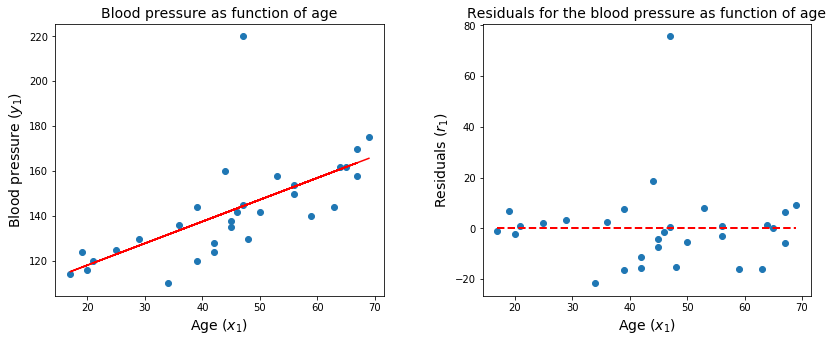

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace=0.3)
ax[0].scatter(x1_,y1_)
ax[0].plot(x1_,predict(x1_,w1,b1),'r')
ax[1].scatter(x1_,r1_)
ax[1].plot([x1_.min(),x1_.max()],[0,0],'--r',lw=2)
ax[0].set_title("Blood pressure as function of age",fontsize=14)
ax[0].set_xlabel('Age ($x_1$)',fontsize=14)
ax[0].set_ylabel('Blood pressure ($y_1$)',fontsize=14)
ax[1].set_title("Residuals for the blood pressure as function of age",fontsize=14)
ax[1].set_xlabel('Age ($x_1$)',fontsize=14)
ax[1].set_ylabel('Residuals ($r_1$)',fontsize=14)
plt.show()

As we see above, the observations are scattered around the regression line, and the residuals are scattered around the zero mean of the residuals (horizontal dashed line). However, there is one observation (and a corresponding residual) that lying far away compared to the rest. That might be an outlier.

#### Fit the linear regression model for the star cluster dataset

Let's, calculate the parameters of the simple linear regressions model for the star cluster data set, and also calculate the residuals:

In [9]:
b2,w2=fit(x2_,y2_)
r2_=y2_-predict(x2_,w2,b2)
print('"Star cluster" model (complete dataset) has intercept {0:f} and slope {1:f}'.format(b2,w2))

"Star cluster" model (complete dataset) has intercept 6.793467 and slope -0.413304


Then make the scatter plot for observations together with the estimated linear regression lines on a plot. In a separate plot, create the scatter plot for residuals together with the zero mean of residuals.

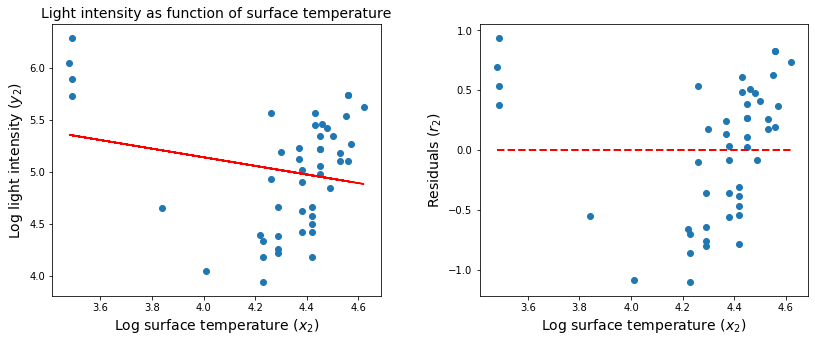

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace=0.3)
ax[0].scatter(x2_,y2_)
ax[0].plot(x2_,predict(x2_,w2,b2),'r')
ax[1].scatter(x2_,r2_)
ax[1].plot([x2_.min(),x2_.max()],[0,0],'--r',lw=2)
ax[0].set_title("Light intensity as function of surface temperature",fontsize=14)
ax[0].set_xlabel('Log surface temperature ($x_2$)',fontsize=14)
ax[0].set_ylabel('Log light intensity ($y_2$)',fontsize=14)
ax[1].set_xlabel('Log surface temperature ($x_2$)',fontsize=14)
ax[1].set_ylabel('Residuals ($r_2$)',fontsize=14)
plt.show()

That looks quite strange. If we look closer to the observations, we might observe that there are two distinct clusters of observations. One cluster of observations can be found on the top left - formed by 4 observations lying almost on a vertical line -, while the rest are more scattered on the right side of the plot. If we are focusing on the second cluster of observations, then we might observe a linear relationship between input and output, but that is not the estimated regression line drawn with red based on all observations. It seems as the estimated regression line is puller toward the first cluster of observations. If we look to the residual plots, nothing special can be observed except that the residuals might follow a parabolic curve.

## 3. Identifying the outlier <a name="OutlierIdentification"></a>

There are no strict mathematical formulas to identify an outlier. Here we present some graphical methods. Two graphical methods were already discussed above, namely the observations with the estimated regression line and the residual plot. More formal discussion of outliers will be presented in Chapter 3 of the book (related to multiple linear regression) and in the associated Jupyter Notebooks.

#### Identifying outtlier for the blood pressure dataset

Let's, make the histogram plot for the residuals, as well as the probability plot for normal distribution.

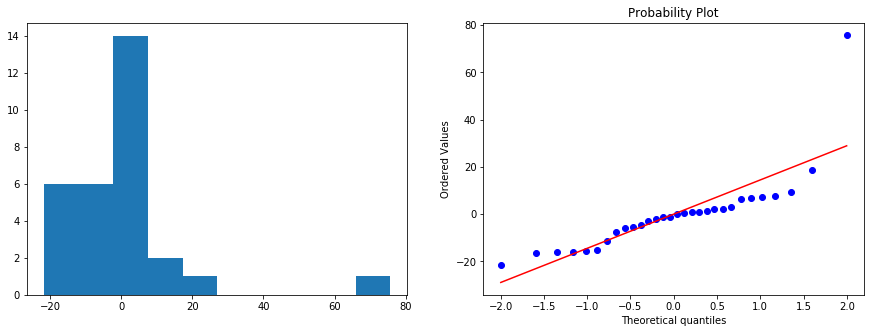

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(r1_)
result=stats.probplot(np.ravel(r1_), plot=ax[1])
plt.show()

We can see that there is one observation that is far from both the normal distribution (on the left) and the straight line of the normal probability plot (on the right). Observing the plots of $y$ values, as well as the residuals there is a data point that has at least 3-4 times higher residual then the average residuals corresponding to the larger $y$ value. 

Let's find the index of this observation by searching for the maximum residual.

In [12]:
idx1=r1_.argmax()
print("The index of the largest residual value is:", idx1+1)

The index of the largest residual value is: 2


We call an outlier a leverage point (has high leverage) if the $x$ value is far away from the mean $\overline x$ compared to the rest of the observations. Let's, check if this is a leverage point:

In [13]:
print("Sample mean of x:",x1_.mean())
print("Sample standard deviation of x:",x1_.std(ddof=1))
print("x value of the suspected outlier:",x1_[idx1][0])

Sample mean of x: 45.13333333333333
Sample standard deviation of x: 15.294202943539128
x value of the suspected outlier: 47


We can see that the suspected outlier has low leverage, as its $x$ value is very close to the mean of the input variable. Thus, this is not a leverage point. <br>
Now, create the reduced data set which does not contain the suspected outlier.

In [14]:
x12_=np.delete(x1_,idx1,axis=0)
y12_=np.delete(y1_,idx1,axis=0)
N12,_=x12_.shape
print("Number of observations in the reduced data set is:",N12)

Number of observations in the reduced data set is: 29


Creating the model for the reduced dataset.

In [15]:
b12,w12=fit(x12_,y12_)
r12_=y12_-predict(x12_,w12,b12)
print("First model (without outlier) has intercept {0:f} and slope {1:f}".format(b12,w12))
print("Change in the intercept is {0:.2f}% and slope is {1:.2f}% compared to the original model.".\
      format((b12-b1)/b1*100,(w12-w1)/w1*100))

First model (without outlier) has intercept 97.077084 and slope 0.949323
Change in the intercept is -1.66% and slope is -2.22% compared to the original model.


We can observe, that removing the suspected outlier from the dataset does not change significantly our model, the regression coefficients remain almost the same (the absolute change in regression coefficients is around 2%).

Let's plot the histogram and normal probability plot of the residuals for the reduced dataset.

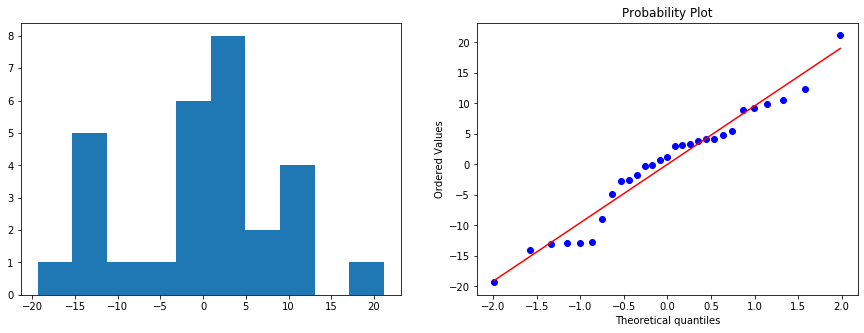

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(r12_)
result=stats.probplot(np.ravel(r12_), plot=ax[1])
plt.show()

The residuals still not following perfectly the normal distribution, but at least the normal probability plot shows that there is no point being far from the straight line. <br>
Let's, make the scatter plot for observations from the reduced data set together with the estimated linear regression lines, respective the scatter plot for residuals together with the (zero) mean of residuals.

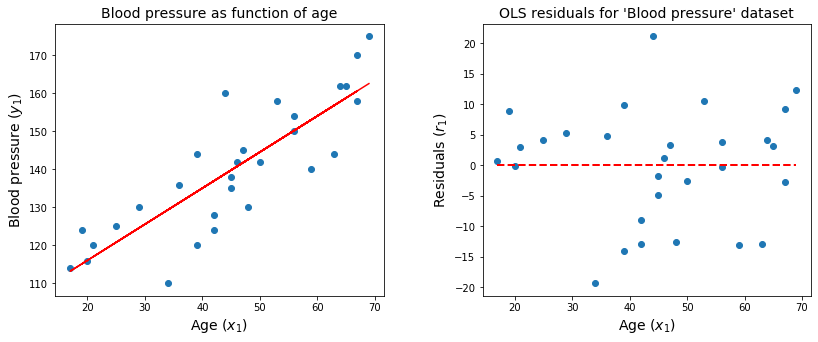

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace=0.3)
ax[0].scatter(x12_,y12_)
ax[0].plot(x12_,predict(x12_,w12,b12),'r')
ax[1].scatter(x12_,r12_)
ax[1].plot([x12_.min(),x12_.max()],[0,0],'--r',lw=2)
ax[0].set_title("Blood pressure as function of age",fontsize=14)
ax[0].set_xlabel('Age ($x_1$)',fontsize=14)
ax[0].set_ylabel('Blood pressure ($y_1$)',fontsize=14)
ax[1].set_title("OLS residuals for 'Blood pressure' dataset",fontsize=14)
ax[1].set_xlabel('Age ($x_1$)',fontsize=14)
ax[1].set_ylabel('Residuals ($r_1$)',fontsize=14)
plt.show()

The observation far from the estimated regression line is removed, and there is no residual which is outside of the cluster of residuals.

#### Identifying outtlier for the star cluster dataset

Let's, make the histogram plot for the residuals, as well as the probability plot for normal distribution.

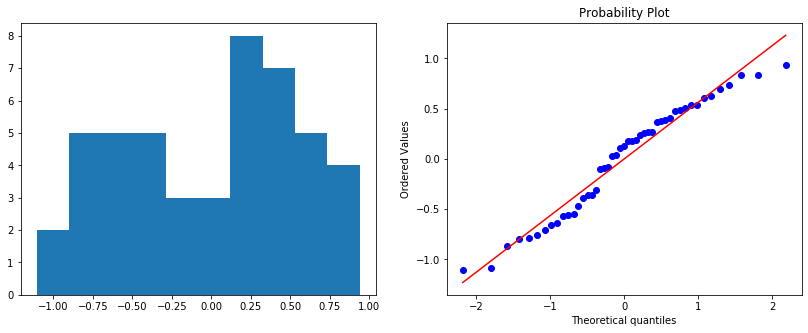

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].hist(r2_)
result=stats.probplot(np.ravel(r2_), plot=ax[1])
plt.show()

The residuals seem to have an approximately normal distribution, so this does not show any outlier. Let's, see if there is any leverage point (an observation that has an x value far from the rest of the observations). For this reason, we calculate the sample mean and standard deviation of $x$, and if a value is a certain number of standard deviations away from the mean, that data point is identified as an outlier with high leverage. The specified number of standard deviations is called the threshold. In general, the chosen threshold value is 3 (99.7% of the population would fall in the $(\mu-3\sigma,\mu+3\sigma)$ interval, so we are looking for the 0.3% of observations being outside of this interval).

In [19]:
print("Sample mean of x:",x2_.mean())
print("Sample standard deviation of x:",x2_.std(ddof=1))
threshold=3.0
idx2=np.abs((x2_-x2_.mean())/(x2_.std(ddof=1)))>threshold
print("Indeces of suspected leverages:",np.where(idx2)[0])
print("x values of suspected leverages:",x2_[idx2])

Sample mean of x: 4.31
Sample standard deviation of x: 0.2908234187089568
Indeces of suspected leverages: []
x values of suspected leverages: []


As we can see, no high leverage point is shown, although we suspect that the 4 points on the top left might be outliers. This method can fail to detect outliers because the 4 outliers increase the standard deviation. The more extreme the outlier, the more the standard deviation is affected. Moreover, if there is more than one outlier, they will increase the standard deviation. Let's, lower slightly the threshold to an arbitrary chosen 2.8 value.

**Note:** *The chosen threshold value does not have any mathematical reasoning. We just know from the graph, that by lowering the threshold high leverage points will be identified. More advanced outlier detection method will be discussed in Chapter 3 of the book with the accompanying Jupyter Notebooks.*

In [20]:
threshold=2.8
idx2=np.abs((x2_-x2_.mean())/(x2_.std(ddof=1)))>threshold
print("Indeces of suspected leverages:",np.where(idx2)[0])
print("x values of suspected leverages:",x2_[idx2])

Indeces of suspected leverages: [10 19 29 33]
x values of suspected leverages: [3.49 3.49 3.48 3.49]


Ler's, create the reduced dataset removing the 4 outliers.

In [21]:
x22_=np.delete(x2_,np.where(idx2)[0],axis=0)
y22_=np.delete(y2_,np.where(idx2)[0],axis=0)
N22,_=x22_.shape
print("Number of observations in the reduced data set is:",N22)

Number of observations in the reduced data set is: 43


Then create the linear model for the reduced dataset.

In [22]:
b22,w22=fit(x22_,y22_)
r22_=y22_-predict(x22_,w22,b22)
print('"Star cluster" model (without outliers) has intercept {0:f} and slope {1:f}'.format(b22,w22))
print("Change in the intercept is {0:.2f}% and slope is {1:.2f}% compared to the original model."\
      .format((b22-b2)/b2*100,(w22-w1)/w2*100))

"Star cluster" model (without outliers) has intercept -4.056524 and slope 2.046657
Change in the intercept is -159.71% and slope is -260.29% compared to the original model.


As we can observe, the regression coefficients are changed significantly. Not only the value, but the slope also changed from a negative to a positive value, and the inverse relation is changed to a positive relation between input and output.

## 4. Comparing the models (with and without outliers) <a name="ModelComparison"></a>

We observed that removing the outlier from the first dataset will not affect our model, while in the second dataset removing the outliers affected significantly our model. Now, let's see if removing the outlier from the dataset improves the score of the linear model. For this reason, check the goodness of fit of the models by calculating the standard error of estimate and the R-squared values for both the original dataset and the reduced dataset and compare the result.

#### Comparison for the "Blood pressure vs. age" dataset

Let's, calculate the residual sum of squares and the standard error of estimates:

In [23]:
RSS1=np.sum((y1_-predict(x1_,w1,b1))**2)
RSS12=np.sum((y12_-predict(x12_,w12,b12))**2)
RMSE1=np.sqrt(1/(N1-2)*RSS1)
RMSE12=np.sqrt(1/(N12-2)*RSS12)
print("Residual sum of squares for original data set is %f, and for reduced data set is %f"%(RSS1,RSS12))
print("Standard error of estimate for original data set is %f, and for reduced data set is %f"%(RMSE1,RMSE12))

Residual sum of squares for original data set is 8393.443981, and for reduced data set is 2469.346544
Standard error of estimate for original data set is 17.313748, and for reduced data set is 9.563330


As we can observe, the standard error of estimate reduced significantly by removing the outlier from the dataset. Now, let's calculate the coefficient of determination (R-squared value).

In [24]:
SST1=np.sum((y1_-y1_.mean())**2)
SST12=np.sum((y12_-y12_.mean())**2)
R2_1=1-RSS1/SST1
R2_12=1-RSS12/SST12
print("R-squared value for original data set is %1.2f, and for reduced data set is %1.2f"%(R2_1,R2_12))

R-squared value for original data set is 0.43, and for reduced data set is 0.71


As can be observed, the R-squared value is also increased significantly. While in the case of the original dataset, the fitted model explained only 43% of the variation in blood pressure based on the age, with the reduced dataset the fitted model explained 71% of the variation in blood pressure based on the age of a person. 

**The slope of the estimated regression line remains almost the same even though the R-squared is increased, and the standard error of estimate is decreased significantly. We can state that this observation is an outlier in the $y$ direction with low leverage and does not influence the model parameters.).**

This is also a good example to show, that although the two models (with and without the outlier) are almost the same, the R-squared value, as a measure of the goodness of fit of our model, is changed significantly. That is, the R-squared value (or standard error of estimate) alone does not provide a sufficient measure about our goodness of fit.

Finally, make the plot of the estimated regression line for both models on the same graph.

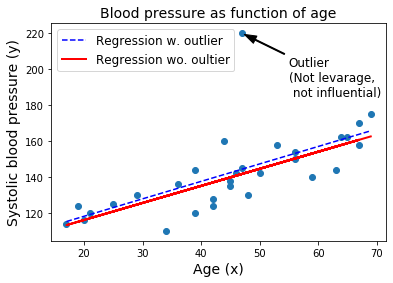

In [25]:
plt.scatter(x1_,y1_)
line1,=plt.plot([x1_.min(),x1_.max()],predict(np.array([x1_.min(),x1_.max()]),w1,b1),'--b')
line2,=plt.plot(x12_,predict(x12_,w12,b12),'r',linewidth=2)
plt.legend([line1,line2],["Regression w. outlier","Regression wo. oultier"],fontsize=12)
plt.title("Blood pressure as function of age",fontsize=14)
plt.xlabel("Age (x)",fontsize=14)
plt.ylabel("Systolic blood pressure (y)",fontsize=14)
plt.gcf().gca().annotate('Outlier\n(Not levarage,\n not influential)', xy=(x1_[y1_.argmax(),0], np.max(y1_)), \
                         xytext=(55, 185), fontsize=12, arrowprops=dict(facecolor='black', width=1, headwidth=8, shrink=0.05))
plt.show()

As we can see, the outlier pulls the estimated regression line slightly upward but does not change the slope of the regression line. If one makes a prediction based on the full dataset, the blood pressure of persons based on their age is slightly overestimated. However, the slope of the estimated regression line is not affected (significantly) by the outlier.  Remember, the slope tells us how much the output changes when the input changes with one unit. 

Thus, removing the outlier only decreases the overall error, but does not change the model coefficient (slope).

#### Comparison for the star cluster dataset

Let's, calculate the residual sum of squares and the standard error of estimates:

In [26]:
RSS2=np.sum((y2_-predict(x2_,w2,b2))**2)
RSS22=np.sum((y22_-predict(x22_,w22,b22))**2)
RMSE2=np.sqrt(1/(N2-2)*RSS2)
RMSE22=np.sqrt(1/(N22-2)*RSS22)
print("Residual sum of squares for original data set is %f, and for reduced data set is %f"%(RSS2,RSS22))
print("Standard error of estimate for original data set is %f, and for reduced data set is %f"%(RMSE2,RMSE22))

Residual sum of squares for original data set is 14.346395, and for reduced data set is 6.751821
Standard error of estimate for original data set is 0.564632, and for reduced data set is 0.405806


As we can observe again, the standard error of estimate is reduced significantly by removing the 4 outliers from the dataset. Let's calculate the coefficient of determination.

In [27]:
SST2=np.sum((y2_-y2_.mean())**2)
SST22=np.sum((y22_-y22_.mean())**2)
R2_2=1-RSS2/SST2
R2_22=1-RSS22/SST22
print("R-squared value for original data set is %1.2f, and for reduced data set is %1.2f"%(R2_2,R2_22))

R-squared value for original data set is 0.04, and for reduced data set is 0.37


The R-squared value is also increased significantly. While in the case of the original dataset the fitted model explained nothing regarding the variation in the log light intensity of the star, with the reduced dataset the fitted model explained 37% of the variation in log light intensity based on the log surface temperature of a star. 

**Moreover, we have a completely different model, where both the intercept and the slope of the estimated regression line is changed significantly. So these 4 outliers, having high leverage, also are influential points, as there presence influence significantly the model parameters.**

Finally, make the plot of the estimated regression line for both models on the same graph.

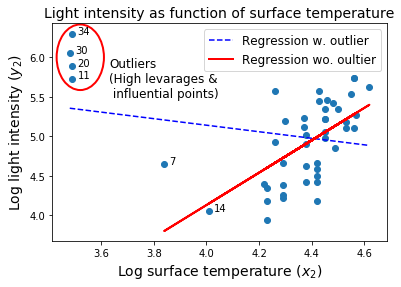

In [28]:
from matplotlib.patches import Ellipse
plt.scatter(x2_,y2_)
line1,=plt.plot([x2_.min(),x2_.max()],predict(np.array([x2_.min(),x2_.max()]),w2,b2),'--b')
line2,=plt.plot(x22_,predict(x22_,w22,b22),'r',linewidth=2)
for i in np.nonzero(idx2)[0]:
    plt.gcf().gca().annotate(str(i+1),(x2_[i],y2_[i]),(x2_[i]+0.02,y2_[i]))
for i in [6,13]:
    plt.gcf().gca().annotate(str(i+1),(x2_[i],y2_[i]),(x2_[i]+0.02,y2_[i]))
plt.gcf().gca().add_artist(Ellipse(xy=(3.52,6.0), width=0.18, height=0.83, edgecolor='r', fc='None', lw=2))
plt.legend([line1,line2],["Regression w. outlier","Regression wo. oultier"],fontsize=12)
plt.title("Light intensity as function of surface temperature",fontsize=14)
plt.xlabel('Log surface temperature ($x_2$)',fontsize=14)
plt.ylabel('Log light intensity ($y_2$)',fontsize=14)
plt.gcf().gca().annotate('Outliers\n(High levarages &\n influential points)', xy=(x2_[idx2][0],y2_[idx2][0]), \
                         xytext=(3.63, 5.5), fontsize=12)
plt.show()

As we can see, the outliers - also leverage points - are also influential because they affect greatly the estimated regression model parameters $w$ and $b$. Removing those observations greatly improves not only the R-squared value - with outliers, the R-squared value would be almost zero - but provides a useful linear model, which can provide better predictions. 

## 5. Robust metric <a name="RobustMetric"></a>

Although, both the R-squared value and the mean square error are very popular regression metrics, they are not robust to outliers. That is, their value is greatly affected by one or several outliers. For this reason, the median absolute error (MAE) can be used, which is less sensitive to outliers. Let's calculate the absolute median error and the maximum residual value for the Blood pressure dataset with and without outliers.

In [29]:
print(np.max(np.abs(y1_-predict(x1_,w1,b1))))
print(np.median(np.abs(y1_-predict(x1_,w1,b1))))
print(np.max(np.abs(y12_-predict(x12_,w12,b12))))
print(np.median(np.abs(y12_-predict(x12_,w12,b12))))

75.65437534397358
6.0
21.152724091630375
4.79659844570125


We can observe that, in the case of the "Blood pressure" dataset, the maximum residual is 75.65 with outlier included and only 21.8 with outlier excluded. The MAE is decreased with the outlier removed because the dataset is small. Let's compare the MSE with MAE for both data set with and without outlier(s).

In [30]:
from sklearn.metrics import median_absolute_error,mean_squared_error
MSE1=mean_squared_error(y1_,predict(x1_,w1,b1))
MSE12=mean_squared_error(y12_,predict(x12_,w12,b12))
MAE1=median_absolute_error(y1_,predict(x1_,w1,b1))
MAE12=median_absolute_error(y12_,predict(x12_,w12,b12))
print("Blood pressure vs. age data:")
print('--------------------------------------')
print("MSE with outlier:",MSE1)
print("MAE with outlier:",MAE1)
print("MSE without outlier:",MSE12)
print("MAE without outlier:",MAE12)
print("Change in MSE is %2.2f and change in MAE is %2.2f percent."%((MSE12-MSE1)/MSE1*100,(MAE12-MAE1)/MAE1*100))
print()
MSE2=mean_squared_error(y2_,predict(x2_,w2,b2))
MSE22=mean_squared_error(y22_,predict(x22_,w22,b22))
MAE2=median_absolute_error(y2_,predict(x2_,w2,b2))
MAE22=median_absolute_error(y22_,predict(x22_,w22,b22))
print("Star cluster data:")
print('--------------------------------------')
print("MSE with outlier:",MSE2)
print("MAE with outlier:",MAE2)
print("MSE without outlier:",MSE22)
print("MAE without outlier:",MAE22)
print("Change in MSE is %2.2f and change in MAE is %2.2f percent."%((MSE22-MSE2)/MSE2*100,(MAE22-MAE2)/MAE2*100))

Blood pressure vs. age data:
--------------------------------------
MSE with outlier: 279.78146604816936
MAE with outlier: 6.0
MSE without outlier: 85.14988081090675
MAE without outlier: 4.79659844570125
Change in MSE is -69.57 and change in MAE is -20.06 percent.

Star cluster data:
--------------------------------------
MSE with outlier: 0.3052424388557143
MAE with outlier: 0.4781339967253322
MSE without outlier: 0.15701908348109803
MAE without outlier: 0.2888982632500099
Change in MSE is -48.56 and change in MAE is -39.58 percent.


In case of blood pressure, the MSE drops to one-third of the original value (when the outlier is included), while the MAE decreases only to 80% of the original value. The difference in the case of the "Star cluster" dataset is not so pronounced, but we should consider the fact that with small datasets even the median is affected when several observations are removed. 

## 6. Synthetic data for other types of outliers <a name="SyntheticData"></a>

We have seen first an example with an outlier neither being leverage nor an influential point, and a second example with outliers being both with high leverage and being influential points. Now, let's see other examples with outlier not being leverage, but an influential point or an outlier having high leverage, but not being an influential point.

#### Not leverage point, but influential

For this reason, we will change the $x$ and $y$ value of the outlier observed in the "Blood pressure" dataset, and we also use the previously reduced dataset, which does not contain this outlier. The $x$ value of the outlier will be modified to be two standard deviations away in a positive direction to the mean of $x$ of the reduced dataset. The $y$ value of the outlier will be modified to be 20 standard deviations away in a positive direction to the mean of $y$ of the reduced dataset. Because of this, the outlier will not have high leverage, but let's check whether is an influential point.

In [31]:
x1_[idx1]=x12_.mean()+2*x12_.std(ddof=1)
y1_[idx1]=y12_.mean()+15*y12_.std(ddof=1)
b1,w1=fit(x1_,y1_)
r1_=y1_-predict(x1_,w1,b1)

Calculate the residual sum of squares and standard error of estimates for the datasets with and without the outlier.

In [32]:
RSS1=np.sum((y1_-predict(x1_,w1,b1))**2)
RSS12=np.sum((y12_-predict(x12_,w12,b12))**2)
RMSE1=np.sqrt(1/(N1-2)*RSS1)
RMSE12=np.sqrt(1/(N12-2)*RSS12)
print("Residual sum of squares for original data set is %f, and for reduced data set is %f"%(RSS1,RSS12))
print("Standard error of estimate for original data set is %f, and for reduced data set is %f"%(RMSE1,RMSE12))

Residual sum of squares for original data set is 48559.941179, and for reduced data set is 2469.346544
Standard error of estimate for original data set is 41.644731, and for reduced data set is 9.563330


As we can observe, the standard error of estimate reduced significantly by removing the outlier from the data set. Now, let's calculate the coefficient of determination.

In [33]:
SST1=np.sum((y1_-y1_.mean())**2)
SST12=np.sum((y12_-y12_.mean())**2)
R2_1=1-RSS1/SST1
R2_12=1-RSS12/SST12
print("R-squared value for original data set is %1.2f, and for reduced data set is %1.2f"%(R2_1,R2_12))

R-squared value for original data set is 0.35, and for reduced data set is 0.71


As can be observed, the R-squared value is also increased significantly. While in the case of the dataset with outlier the fitted model explained only 15% of the variation in blood pressure, with the reduced dataset the fitted model explained 71% of the variation in blood pressure based on the age of a person.

Let's, check how the intercept, and especially the slope of the fitted model, is changed when the outlier is removed.

In [34]:
print("Change in intercept from {0:3.2f} to {1:3.2f} which is {2:3.2f}%".format(b1,b12,(b12-b1)/b1*100))
print("Change in slope from {0:3.2f} to {1:3.2f} which is {2:3.2f}%".format(w1,w12,(w12-w1)/w1*100))

Change in intercept from 63.19 to 97.08 which is 53.62%
Change in slope from 1.85 to 0.95 which is -48.76%


As you can see, both the intercept and the slope of the estimated regression line is changed. Thus, this observation is an outlier with low leverage, but being an influential point.

Finally, make the plot of the estimated regression line for both models on the same graph.

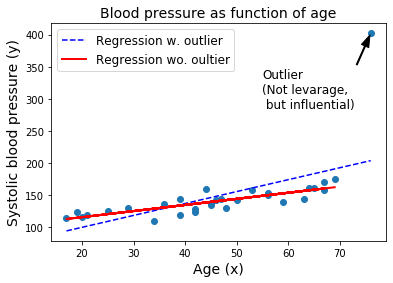

In [35]:
plt.scatter(x1_,y1_)
line1,=plt.plot([x1_.min(),x1_.max()],predict(np.array([x1_.min(),x1_.max()]),w1,b1),'--b')
line2,=plt.plot(x12_,predict(x12_,w12,b12),'r',linewidth=2)
plt.legend([line1,line2],["Regression w. outlier","Regression wo. oultier"],fontsize=12)
plt.title("Blood pressure as function of age",fontsize=14)
plt.xlabel("Age (x)",fontsize=14)
plt.ylabel("Systolic blood pressure (y)",fontsize=14)
plt.gcf().gca().annotate('Outlier\n(Not levarage,\n but influential)', xy=(x1_[y1_.argmax(),0], np.max(y1_)), \
                         xytext=(55, 285), fontsize=12, arrowprops=dict(facecolor='black', width=1, headwidth=8, shrink=0.05))
plt.show()

Of course, a systolic blood pressure of around 400 units is lethal, so one should exclude from the dataset as a typing error without too much analysis. It was just used as a demonstration for an outlier in $y$ direction with low leverage, but being an influential point.

#### Leverage point, but not influential

For this reason, we will change the $x$ and $y$ value of the outlier observed in the "Blood pressure" dataset, and we also use the previously reduced dataset, which does not contain this outlier. The $x$ value of the outlier will be modified to be with five standard deviations away in a positive direction to the mean of $x$ of the reduced dataset. The $y$ value of the outlier will be modified to be the conditional mean of the $x$ of the outlier (to lie on the estimated regression line). Because of this, the outlier will have high leverage, but let's check whether it is an influential point.

In [36]:
x1_[idx1]=x12_.mean()+5*x12_.std(ddof=1)
y1_[idx1]=b12+w12*x1_[idx1]
b1,w1=fit(x1_,y1_)
r1_=y1_-predict(x1_,w1,b1)

Calculate the residual sum of squares and the standard error of estimates for the datasets with and without the outlier.

In [37]:
RSS1=np.sum((y1_-predict(x1_,w1,b1))**2)
RSS12=np.sum((y12_-predict(x12_,w12,b12))**2)
RMSE1=np.sqrt(1/(N1-2)*RSS1)
RMSE12=np.sqrt(1/(N12-2)*RSS12)
print("Residual sum of squares for original data set is %f, and for reduced data set is %f"%(RSS1,RSS12))
print("Standard error of estimate for original data set is %f, and for reduced data set is %f"%(RMSE1,RMSE12))

Residual sum of squares for original data set is 2469.765965, and for reduced data set is 2469.346544
Standard error of estimate for original data set is 9.391801, and for reduced data set is 9.563330


As we can observe, the standard error of estimate reduced significantly by removing the outlier from the data set. Now, let's calculate the coefficient of determination.

In [38]:
SST1=np.sum((y1_-y1_.mean())**2)
SST12=np.sum((y12_-y12_.mean())**2)
R2_1=1-RSS1/SST1
R2_12=1-RSS12/SST12
print("R-squared value for original data set is %1.2f, and for reduced data set is %1.2f"%(R2_1,R2_12))

R-squared value for original data set is 0.82, and for reduced data set is 0.71


As can be observed, the R-squared value is decreased! While in the case of the dataset with the outlier included, the fitted model explained 82% of the variation in blood pressure based, with the reduced dataset (outlier removed) the fitted model explained only 71% of the variation in blood pressure based on the age of a person.

Let's, check how the intercept, and especially the slope of the fitted model, is changed when the outlier is removed.

In [39]:
print("Change in intercept from {0:3.2f} to {1:3.2f} which is {2:3.2f}%".format(b1,b12,(b12-b1)/b1*100))
print("Change in slope from {0:3.2f} to {1:3.2f} which is {2:3.2f}%".format(w1,w12,(w12-w1)/w1*100))

Change in intercept from 97.30 to 97.08 which is -0.23%
Change in slope from 0.94 to 0.95 which is 0.56%


As you can see, neither the intercept nor the slope of the estimated regression line is changed (this should not be a surprise as we deliberately set the outlier to be on the estimated regression line).

Finally, make the plot of the estimated regression line for both models on the same graph.

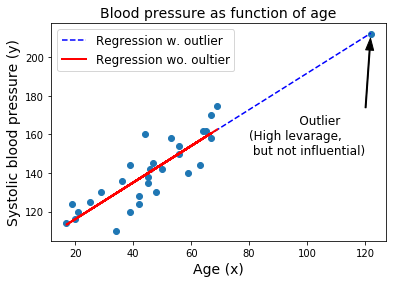

In [40]:
plt.scatter(x1_,y1_)
line1,=plt.plot([x1_.min(),x1_.max()],predict(np.array([x1_.min(),x1_.max()]),w1,b1),'--b')
#line1,=plt.plot(x1_,predict(x1_,w1,b1),':b')
line2,=plt.plot(x12_,predict(x12_,w12,b12),'r',linewidth=2)
plt.legend([line1,line2],["Regression w. outlier","Regression wo. oultier"],fontsize=12)
plt.title("Blood pressure as function of age",fontsize=14)
plt.xlabel("Age (x)",fontsize=14)
plt.ylabel("Systolic blood pressure (y)",fontsize=14)
plt.gcf().gca().annotate('             Outlier\n(High levarage,\n but not influential)', xy=(x1_[y1_.argmax(),0], \
            np.max(y1_)), xytext=(80, 150), fontsize=12, arrowprops=dict(facecolor='black', width=1, headwidth=8, shrink=0.05))
plt.show()

Although a 120 years old person in a sample is very unlikely, still not impossible, so one should not exclude from the dataset without analysis. This is a good example of an outlier with high leverage but not being an influential point. What is also interesting that the R-squared value decreased by removing the outlier, although the model parameters are not changed. This is again a good example that we should not rely only on the coefficient of determination.

<img src = "images/AML1-Cover.png" width = 90, align = "left" style="margin:0px 20px">

**Note:** This Jupyter Notebook is accompanying the book: <br><i>"Machine Learning - From Theory to Practice with NumPy and scikit-learn, Volume 1: Generalized Linear Models"</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).